Enter number of nodes: 3
Enter number of edges for node 1: 2
Enter edge 1 for node 1: 2 5
Enter edge 2 for node 1: 3 2
Enter number of edges for node 2: 2
Enter edge 1 for node 2: 1 4
Enter edge 2 for node 2: 3 1
Enter number of edges for node 3: 1
Enter edge 1 for node 3: 2 6
Edges of the Minimum Spanning Tree:
2 -- 3 == 1
1 -- 3 == 2


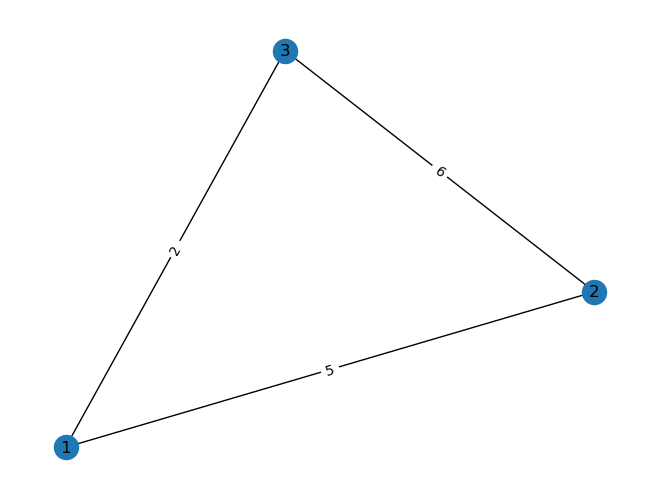

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def find_parent(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_parent(parent, parent[i])

    def union(self, parent, rank, x, y):
        x_root = self.find_parent(parent, x)
        y_root = self.find_parent(parent, y)

        if rank[x_root] < rank[y_root]:
            parent[x_root] = y_root
        elif rank[x_root] > rank[y_root]:
            parent[y_root] = x_root
        else:
            parent[y_root] = x_root
            rank[x_root] += 1

    def kruskal_mst(self):
        result = []
        i, e = 0, 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []

        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find_parent(parent, u)
            y = self.find_parent(parent, v)

            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)

        return result

    def create_networkx_graph(self):
        G = nx.Graph()
        for u, v, w in self.graph:
            G.add_edge(u + 1, v + 1, weight=w)
        return G

if __name__ == "__main__":
    num_nodes = int(input("Enter number of nodes: "))
    g = Graph(num_nodes)
    for i in range(num_nodes):
        num_edges = int(input(f"Enter number of edges for node {i+1}: "))
        for j in range(num_edges):
            edge = input(f"Enter edge {j+1} for node {i+1}: ").split()
            g.add_edge(i, int(edge[0])-1, int(edge[1]))

    mst_edges = g.kruskal_mst()
    print("Edges of the Minimum Spanning Tree:")
    for u, v, w in mst_edges:
        print(f"{u+1} -- {v+1} == {w}")

    # Create NetworkX graph
    G = g.create_networkx_graph()

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()
